# Before vs after normalization comparison

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## 1. Evaluation function

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    ## Train the model and evaluate its performance
    model.fit(X_train, y_train)
    ## Make predictions on the training and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    ## Calculate accuracy, precision, recall, and F1 score
    results = {
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_f1': f1_score(y_train, y_pred_train, average='weighted'),
        'test_f1': f1_score(y_test, y_pred_test, average='weighted')
    }
    
    return results


In [ ]:
## Dictionary met models en parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM (RBF kernel)': SVC(kernel='rbf'),
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3, weights='distance'),
    'Decision Tree': DecisionTreeClassifier()
}

## 2. Load dataset

In [9]:
df = pd.DataFrame(pd.read_csv('./heart.csv'))

In [10]:
X = df.drop(columns='target')
y = df.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle= True, random_state=42)

## 4. Normalize data

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 5. Evaluate models on both unscaled and scaled data

In [8]:
results_before = {}
results_after = {}

for name, model in models.items():
    results_before[name] = evaluate_model(model, X_train, X_test, y_train, y_test)


In [13]:
for name, model in models.items():
    results_after[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

In [14]:
## dataframe met resultaten voor scaling transponeren en scaled column toevoegen
df_before = pd.DataFrame(results_before).T
df_before['scaled'] = False

## dataframe met resultaten na scaling transponeren en scaled column toevoegen
df_after = pd.DataFrame(results_after).T
df_after['scaled'] = True

# Merge into one DataFrame
df_comparison = pd.concat([df_before, df_after])

# Reorder columns
df_comparison = df_comparison[['scaled', 'train_accuracy', 'test_accuracy', 'train_f1', 'test_f1']]

df_comparison

,scaled,train_accuracy,test_accuracy,train_f1,test_f1
Logistic Regression,False,0.863636,0.885246,0.862721,0.885122
SVM (RBF kernel),False,0.657025,0.704918,0.637232,0.694118
KNN (k=3),False,1.000000,0.655738,1.000000,0.655738
Decision Tree,False,1.000000,0.819672,1.000000,0.819187
Logistic Regression,True,0.863636,0.852459,0.862721,0.852538
SVM (RBF kernel),True,0.921488,0.868852,0.921290,0.868923
KNN (k=3),True,1.000000,0.852459,1.000000,0.852062
Decision Tree,True,1.000000,0.754098,1.000000,0.752240


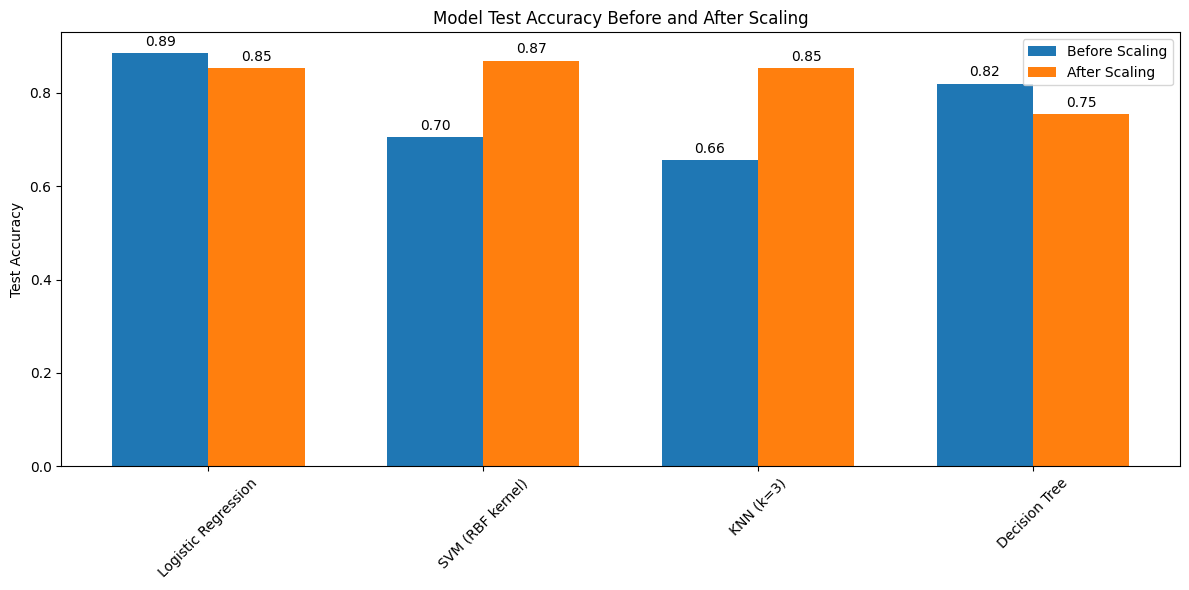

In [16]:
# Select the unique model names
model_names = ['Logistic Regression', 'SVM (RBF kernel)', 'KNN (k=3)', 'Decision Tree']

# Positions for each group
x = np.arange(len(model_names))
width = 0.35

# Extract values
test_accuracy_before = [results_before[model]['test_accuracy'] for model in model_names]
test_accuracy_after = [results_after[model]['test_accuracy'] for model in model_names]

# Create the plot
fig, ax = plt.subplots(figsize=(12,6))

rects1 = ax.bar(x - width/2, test_accuracy_before, width, label='Before Scaling')
rects2 = ax.bar(x + width/2, test_accuracy_after, width, label='After Scaling')

# Labels
ax.set_ylabel('Test Accuracy')
ax.set_title('Model Test Accuracy Before and After Scaling')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

# Annotate
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()